<a href="https://colab.research.google.com/github/deoprakash/R-projects/blob/main/tartrazine_conc_determine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective 1 : import necessary libraries**

In [2]:
#Load necessary library
#install if necessary: install.packages("readr")
library(readr)

## **Objective 2 : Load Dataset**

In [38]:
#import data from csv file
data<- read_csv("/content/tartrazine.csv")
print("Data from csv: ")
View(head(data))

str(data)

Rows: 25 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): Concentration (ppm), Absorbance

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Data from csv: "


Concentration (ppm),Absorbance
<dbl>,<dbl>
0.000000,-0.5428153
4.166667,0.7070061
8.333333,0.5581559
12.500000,-0.1281474
16.666667,0.5440332
20.833333,1.8673849


spc_tbl_ [25 × 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Concentration (ppm): num [1:25] 0 4.17 8.33 12.5 16.67 ...
 $ Absorbance         : num [1:25] -0.543 0.707 0.558 -0.128 0.544 ...
 - attr(*, "spec")=
  .. cols(
  ..   `Concentration (ppm)` = col_double(),
  ..   Absorbance = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


## **Objective 3 : Visualise Dataset**

`geom_smooth()` using formula = 'y ~ x'


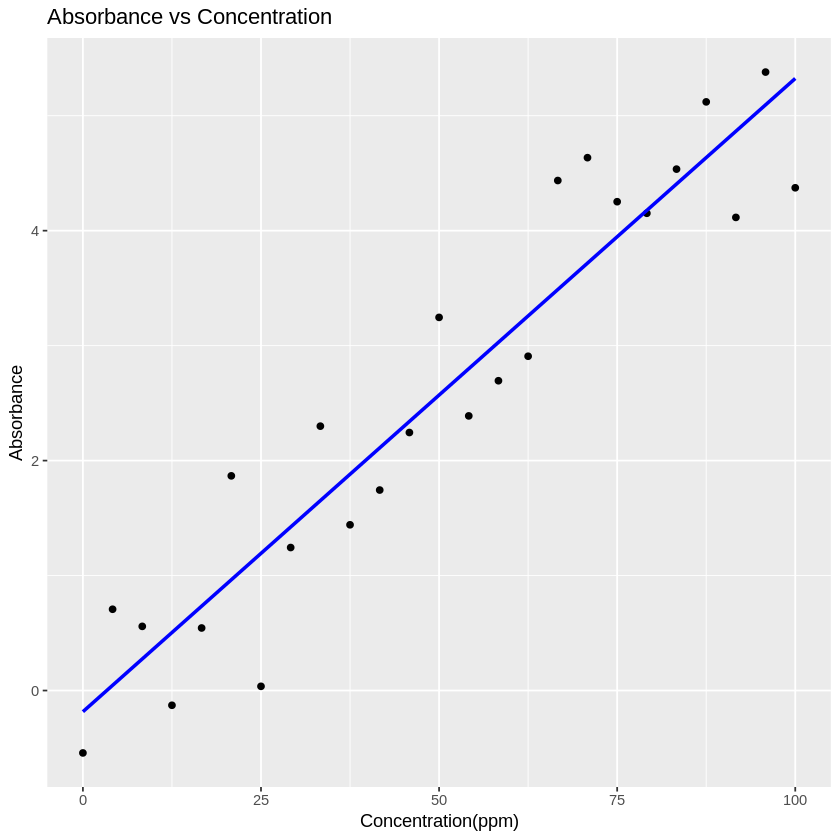

In [39]:
library(ggplot2)

#scatter plot with linear fit

ggplot(data, aes(x = `Concentration (ppm)`, y = Absorbance)) +
  geom_point() +
  geom_smooth (method = "lm", se = FALSE, color="blue") +
  labs(title = "Absorbance vs Concentration",
        x="Concentration(ppm)",
        y = "Absorbance")

## **Objective 4 : Fit Linear Model**

In [47]:
#Fit linear model

model<- lm(`Concentration (ppm)` ~ Absorbance , data = data)

summary(model)


Call:
lm(formula = `Concentration (ppm)` ~ Absorbance, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.8214  -9.1825   0.5792   6.0653  20.8885 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.504      3.696   2.301   0.0308 *  
Absorbance    16.146      1.188  13.596 1.76e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.42 on 23 degrees of freedom
Multiple R-squared:  0.8893,	Adjusted R-squared:  0.8845 
F-statistic: 184.9 on 1 and 23 DF,  p-value: 1.76e-12


## **Objective 5 : Evaluation of Model**

In [52]:
# measure absorbance of unknow sample

unknown_absorbance <- 0.2340

# Predict the unkown concentration

predicted_conc <- predict(model, newdata = data.frame(Absorbance = unknown_absorbance
))
predicted_conc

1 
12.28197

## **Objective 6 : Visualisation of Actual and Predicted Values**

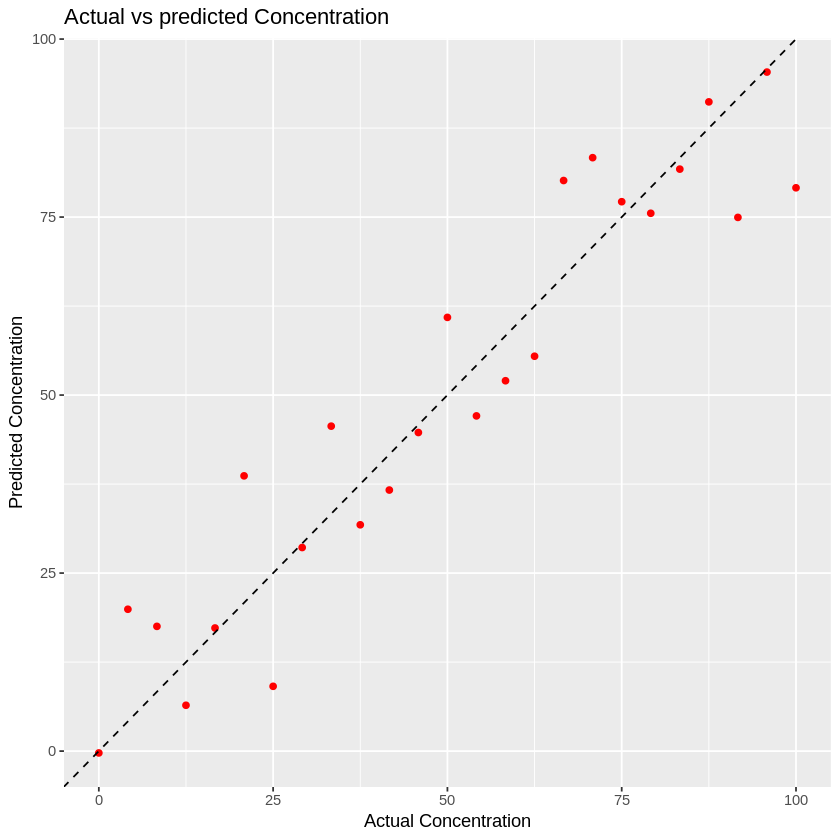

In [53]:
# Add predictions to dataset
data$Predicted <- predict(model, newdata = data)

# Plot actual vs predicted
ggplot(data, aes(x = `Concentration (ppm)`, y = Predicted))+
  geom_point(color = "red") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed")+
  labs(title = "Actual vs predicted Concentration",
        x="Actual Concentration",
        y="Predicted Concentration")


## **Objective 6 : Extract Performance Metrics**

In [57]:
# Calculate RMSE

library(Metrics)
rmse <- rmse(data$`Concentration (ppm)`, data$Predicted)
print(paste("RMSE: ", rmse))

[1] "RMSE:  9.9948836844151"
